<a href="https://colab.research.google.com/github/ERIC10000/MovieRecommendationCollaborativeFiltering/blob/main/CollaborativeFilteringMovieRecommenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendation Systems

## 1. Collaborative Filtering

Source : chatGPT

A technique used in recommendation systems to predict user's interest or preferences by collecting preferences from many users.

### Applications

1. Ecommerce e,g Jumia, recommend products based on user's previous purchases.

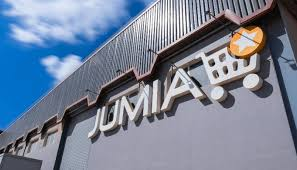

2. Streaming Serveices e,g Netflix, Spotify and Youtube to suggest movies, TV shows or music tracks based on other user's views.

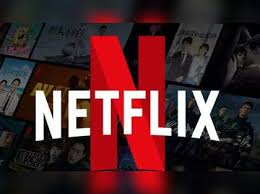

3. Social Media: Platforms like Facebook, Instagram and X, to suggest friends, groups or pages based on other user's interactions.

4. News Aggregators e,g Websites like Google News to recommend articles and news based on uses's reading habits and preferences.


## 2. Content Based Recommendation

Relies on the behaviours, characteristics and preferences of the actual user and user's own historical preferences.

It used Natural Language Processing...


In [2]:
# Reading the Dataset(IMDB WEBSITE)
# Users Datasets
import pandas as pd
users = pd.read_csv('https://msi.martial.co.ke/data/file.csv')
users

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [3]:
# Movie IDS Dataset
movies = pd.read_csv('https://msi.martial.co.ke/data/Movie_Id_Titles.csv')
movies

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [4]:
# Merge the users and movies Dataset
df = pd.merge(users,movies, on='item_id')
df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [5]:
# Exploratory Data Analysis
# 1. Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100003 non-null  int64 
 1   item_id    100003 non-null  int64 
 2   rating     100003 non-null  int64 
 3   timestamp  100003 non-null  int64 
 4   title      100003 non-null  object
dtypes: int64(4), object(1)
memory usage: 3.8+ MB


In [14]:
# 2. Maximium and Minimum Rating and Avearage Rating
df['rating'].max()
df['rating'].min()
df['rating'].mean()
df['title'].count()


100003

In [9]:
# 3. Statistical Analysis
# Total Users: 943
# Total Movies: 100003
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [10]:
# 4.Checking the Empties
df.isnull().sum()

,0
user_id,0
item_id,0
rating,0
timestamp,0
title,0


In [ ]:
# Recommendation based on:
# 1. Rating of the Movies
# 2. Number of Users

In [13]:
# a)Group Movies(Categorical) Based on the Average Rating
#
mean_ratings = df.groupby('title')['rating'].mean()
mean_ratings.sort_values(ascending=False)

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0
...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0
King of New York (1990),1.0
Touki Bouki (Journey of the Hyena) (1973),1.0


In [17]:
# How Many Users Rated a Particular Movie Item
rating_count = df.groupby('title')['rating'].count()
rating_count.sort_values(ascending=False)

,rating
title,
Star Wars (1977),584
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485
...,...
"Great Day in Harlem, A (1994)",1
"Other Voices, Other Rooms (1997)",1
Good Morning (1971),1


In [20]:
# Create a DataFrame that will Contain, the title, mean_rating, number_of_views
df_new = pd.DataFrame(mean_ratings)
df_new['number_of_views'] = pd.DataFrame(rating_count)
df_new.sort_values(by='number_of_views', ascending=False)


,rating,number_of_views
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [ ]:
# PIVOT TABLE
# Data can be Viewed in 3D
# X-Columns
# Y-indexing
# Z-values

In [22]:
pd.set_option('display.max_columns', 100)
pivot = df.pivot_table(index='user_id', columns='title', values='rating')
pivot

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),Alice in Wonderland (1951),Alien (1979),Alien 3 (1992),Alien: Resurrection (1997),Aliens (1986),All About Eve (1950),All Dogs Go to Heaven 2 (1996),All Over Me (1997),All Things Fair (1996),Alphaville (1965),...,What's Love Got to Do with It (1993),When Harry Met Sally... (1989),When Night Is Falling (1995),When We Were Kings (1996),When a Man Loves a Woman (1994),When the Cats Away (Chacun cherche son chat) (1996),While You Were Sleeping (1995),"White Balloon, The (1995)",White Man's Burden (1995),White Squall (1996),"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,1.0,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [29]:
# Selecting a Movie from the Pivot
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
selected_movie = pivot['Godfather, The (1972)']


In [33]:
# Correlation: Relationship between 2 variables
similar = pivot.corrwith(selected_movie)
similar.sort_values(ascending=False)

,0
title,
Dark City (1998),1.0
8 Seconds (1994),1.0
Talking About Sex (1994),1.0
"Godfather, The (1972)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
...,...
Wonderland (1997),NaN
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN
Yankee Zulu (1994),NaN


In [35]:
similar_df = pd.DataFrame(similar, columns=['correlation'])
similar_df.sort_values(by='correlation', ascending=False)

,correlation
title,
Dark City (1998),1.0
8 Seconds (1994),1.0
Talking About Sex (1994),1.0
"Godfather, The (1972)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
...,...
Wonderland (1997),NaN
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN
Yankee Zulu (1994),NaN


In [36]:
# Join the similar_df with the ned_df['number_of_views']
similar_df = similar_df.join(df_new['number_of_views'])
similar_df

,correlation,number_of_views
title,,
'Til There Was You (1997),0.612372,9
1-900 (1994),-0.471405,5
101 Dalmatians (1996),0.084183,109
12 Angry Men (1957),0.034258,125
187 (1997),0.467335,41
...,...,...
Young Guns II (1990),0.129426,44
"Young Poisoner's Handbook, The (1995)",0.059479,41
Zeus and Roxanne (1997),-0.944911,6


In [43]:
# Recommendation:
# Positive Correlation
# Higher Number of Views
condition = similar_df['number_of_views'] > 100
similar_df = similar_df[condition]
recommended_movies = similar_df.sort_values(by='correlation', ascending=False)
recommended_movies.head(20)


,correlation,number_of_views
title,,
"Godfather, The (1972)",1.000000,413
Fargo (1996),0.203942,508
Star Wars (1977),0.189775,584
"English Patient, The (1996)",0.147683,481
Raiders of the Lost Ark (1981),0.138160,420
Toy Story (1995),0.124628,452
Scream (1996),0.100908,478
Contact (1997),0.062343,509
Return of the Jedi (1983),0.053537,507
